In [ ]:
# PASCAL VOT 데이터셋 구성과 구조에 대한 이해
!git clone https://github.com/chulminkw/DLCV.git
!ls -lia DLCV

Cloning into 'DLCV'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 234 (delta 32), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (234/234), 142.72 MiB | 34.04 MiB/s, done.
Resolving deltas: 100% (89/89), done.
total 11016
4851491 drwxr-xr-x 7 root root    4096 Apr  2 06:22  .
6160403 drwxr-xr-x 1 root root    4096 Apr  2 06:22  ..
4851672 drwxr-xr-x 2 root root    4096 Apr  2 06:22  colab_tf115_modify_files
4851675 drwxr-xr-x 6 root root    4096 Apr  2 06:22  data
4851558 drwxr-xr-x 8 root root    4096 Apr  2 06:22  Detection
4851543 -rw-r--r-- 1 root root 6567662 Apr  2 06:22  DLCV_Colab_SrcCode_20200905.zip
4851492 drwxr-xr-x 8 root root    4096 Apr  2 06:22  .git
4851709 -rw-r--r-- 1 root root 2063693 Apr  2 06:22  labelimg.pptx
4851710 -rw-r--r-- 1 root root 2612271 Apr  2 06:22 '구글클라우드 가입하기.pdf'
4851662 -rw-r--r-- 1 root root     142 Apr  2 06:22  README.md
4851663

In [ ]:
# PASCAL VOC 2012 데이터 다운로드 받기
# 디렉토리 이동할 때는 '%'(전역) 사용
%cd /content/DLCV/data/
!rm -rf voc
!mkdir voc

!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
# tar은 여러 개의 파일을 하나의 파일로 묶거나 풀 때 사용하는 명령어임
# tar -xvf file.tar -C [path] : tar파일을 지정된 path 디렉토리에 압축 풀기
!tar -xvf VOCtrainval_11-May-2012.tar -C /content/DLCV/data/voc


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
VOCdevkit/VOC2012/SegmentationClass/2008_001874.png
VOCdevkit/VOC2012/SegmentationClass/2008_001876.png
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC2012/Segmentati

In [ ]:
# 하단 명령어는 해당 디렉토리안에 있는 파일들 상위 5개 보여줘!
!ls /content/DLCV/data/voc/VOCdevkit/VOC2012/JPEGImages | head -n 5

2007_000027.jpg
2007_000032.jpg
2007_000033.jpg
2007_000039.jpg
2007_000042.jpg


img shape: (281, 500, 3)


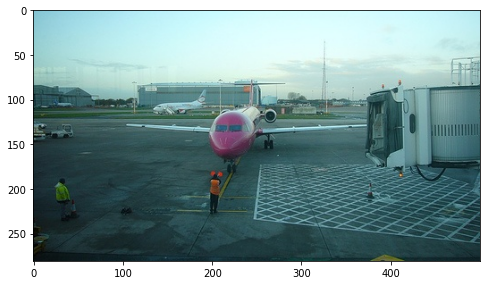

In [ ]:
# 임의의 이미지 로드해서 살펴보기
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

default_dir = "/content/DLCV"
img = cv2.imread(os.path.join(default_dir, 'data/voc/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg'))
# OpenCV의 imread()는 BGR로 반환. 따라서 matplotlib으로 로드하려면 RGB로 변환해주어야 함
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [ ]:
# 위 이미지에 해당하는 XML 파일 확인
!cat /content/DLCV/data/voc/VOCdevkit/VOC2012/Annotations/2007_000032.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

img shape: (281, 500, 3)


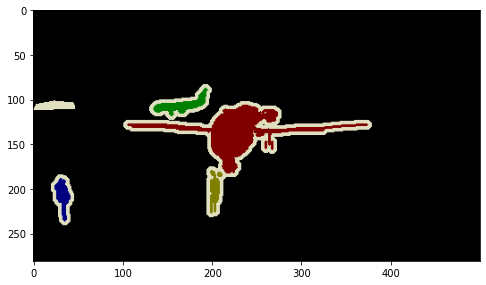

In [ ]:
# 해당 이미지의 Segmentation 폴더에서 masking된 이미지 확인
img = cv2.imread(os.path.join(default_dir, 'data/voc/VOCdevkit/VOC2012/SegmentationObject/2007_000032.png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [ ]:
# Annotation.xml 파일에 있는 요소들을 파싱해서 오브젝트 클래스명, 바운딩 박스 등 정보 얻기
import os
import random

VOC_ROOT_DIR ="/content/DLCV/data/voc/VOCdevkit/VOC2012/"
ANNO_DIR = os.path.join(VOC_ROOT_DIR, "Annotations")
IMAGE_DIR = os.path.join(VOC_ROOT_DIR, "JPEGImages")

# os.listdir(path) : 지정한 디렉토리 내의 모든 파일과 디렉토리를 리스트로 담아 반환!
xml_files = os.listdir(ANNO_DIR)
# ; 으로 코드 한 줄에 연속적으로 입력 가능 -> 출력은 줄바꿈되서 나옴!
print(xml_files[:5]); print(len(xml_files))

['2008_004024.xml', '2009_004848.xml', '2011_003010.xml', '2010_003950.xml', '2009_001251.xml']
17125


In [ ]:
# colab은 lxml 이미 설치되어 있음
# lxml : xml 파일 파싱하기 위한 라이브러리
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

tree = ET.parse(xml_file) # ElementTree 객체로 반환됨
root = tree.getroot() # Element가 담긴 root를 반환 -> 여기서 find(), findall() 메소드를 통해 원하는 정보 얻기!

image_name = root.find('filename').text 
full_image_name = os.path.join(IMAGE_DIR, image_name) # 이미지 파일 이름 디렉토리 경로와 붙이기
image_size = root.find('size')
image_width = int(image_size.find('width').text) # 높이와 너비는 int형으로!
image_height = int(image_size.find('height').text)

# xml 트리 구조에 있는 모든 Object 태그들을 찾아
objects_lst = []
for obj in root.findall('object'):
  # 각 object의 바운딩 박스 정보 얻기
  bnd_box = obj.find('bndbox')
  x1 = int(bnd_box.find('xmin').text)
  y1 = int(bnd_box.find('ymin').text)
  x2 = int(bnd_box.find('xmax').text) # 너비까지 더한 x2 좌표로 저장되어있음
  y2 = int(bnd_box.find('ymax').text) # 높이까지 더한 y2 좌표로 저장되어있음

  bndbox_pos = (x1, y1, x2, y2)
  class_name = obj.find('name').text
  object_dict = {'class_name': class_name, 'bndbox_pos': bndbox_pos}
  objects_lst.append(object_dict)

print("Full image name:", full_image_name, '\n',
      'image_size:', (image_width, image_height))

for o in objects_lst:
  print(o)


Full image name: /content/DLCV/data/voc/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg 
 image_size: (500, 281)
{'class_name': 'aeroplane', 'bndbox_pos': (104, 78, 375, 183)}
{'class_name': 'aeroplane', 'bndbox_pos': (133, 88, 197, 123)}
{'class_name': 'person', 'bndbox_pos': (195, 180, 213, 229)}
{'class_name': 'person', 'bndbox_pos': (26, 189, 44, 238)}


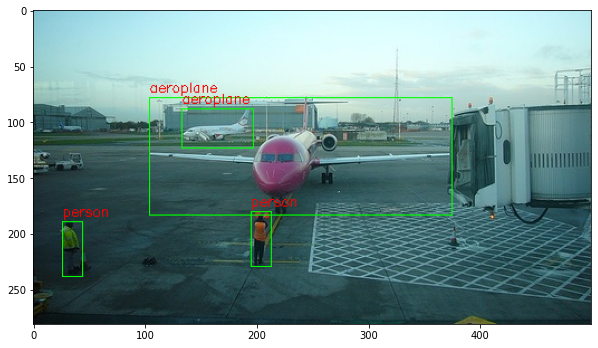

In [ ]:
# 위에서 얻은 Annotation 정보를 갖고 바운딩 박스와 해당 클래스 이름 시각화
import cv2
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)

# 우선 원본 이미지 읽어오기
img = cv2.imread(full_image_name)
draw_img = img.copy()

green_color = (0, 255, 0)
red_color = (0, 0, 255) # BGR 순임!

object_lst = []
for obj in root.findall('object'):
  bnd_box = obj.find('bndbox')

  x1 = int(bnd_box.find('xmin').text)
  y1 = int(bnd_box.find('ymin').text)
  x2 = int(bnd_box.find('xmax').text)
  y2 = int(bnd_box.find('ymax').text)

  class_name = obj.find('name').text

  # 원본 이미지에 바운딩 박스와 클래스 이름 새기기
  cv2.rectangle(draw_img, (x1, y1), (x2, y2), color=green_color,
                thickness=1)
  cv2.putText(draw_img, class_name, (x1, y1-5),
              cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.4,
              color=red_color, thickness=1)

# matplotlib으로 로드하기 위해 Opencv Image를 BGR->RGB로 변환
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.show()